In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df = np.loadtxt(" Please Enter the fitinput.txt path Here ! ")

In [37]:
def yth(x, a, H):
  return a * x ** H

In [53]:
x = df[:, 0]
y = df[:, 1]


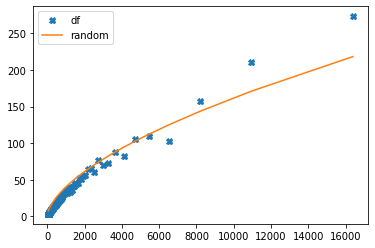

In [55]:
a = np.random.random()
H = np.random.random()
plt.plot(x, y, "X", Label= "df")
plt.plot(x, yth(x, a, H), Label="random")
plt.legend()
plt.show()

In [46]:
a_old = np.random.random()
H_old = np.random.random()
X2_old = 0

for i in range(len(x)):
  X2_old += (y[i] - yth(x[i], a_old, H_old))**2

In [47]:
n = 1000

for i in range(n):
  a_new = a_old + np.random.normal(scale=1)
  H_new = H_old + np.random.normal(scale=1)
  X2_new = 0
  for i in range(len(x)):
    X2_new = (y[i] - yth(x[i], a_new, H_new))**2
  
  dX2 = X2_new - X2_old
  AR = min([1, np.exp(- dX2 / 2)])

  r = np.random.random()
  if r <= AR:
        a_old = a_new
        H_old = H_new
        X2_old = X2_new

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


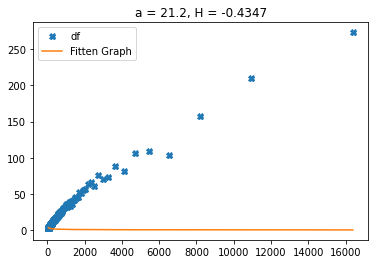

In [48]:
plt.plot(x, y, "X", Label= "df")
plt.plot(x, yth(x, a_old, H_old), "-" , Label="Fitten Graph")
plt.title(f'a = {a_old:0.4}, H = {H_old:0.4}')
plt.legend()
plt.show()

In [49]:
def mcmc(df, n, return_path=True):
    
    x = df[:,0] ; y = df[:,1]
    a_path = [] ; H_path = []

    a_old = np.random.normal() 
    H_old = np.random.normal() 
    X2_old = 0
    for i in range(len(x)):
        X2_old += (y[i] - yth(x[i], a_old, H_old))**2

    for i in range(n):

        a_new = a_old + np.random.normal(scale=.1)
        H_new = H_old + np.random.normal(scale=.1)
        X2_new = 0
        for i in range(len(x)):
            X2_new += (y[i] - yth(x[i], a_new, H_new))**2
        
        d2 = X2_new - X2_old
        AR = min([1, np.exp(- d2/2)])
        r = np.random.random()
        if r <= AR:

            a_old = a_new
            H_old = H_new

            a_path.append(a_new)
            H_path.append(H_new)

            X2_old = X2_new
    
    if return_path==True:
        return a_path, H_path
    else:
        return a_old, H_old 
a_best , H_best = mcmc(df, 10000, False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


(array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 2.]),
 array([0.7707847 , 0.77106924, 0.77135378, 0.77163832, 0.77192286,
        0.7722074 , 0.77249194, 0.77277648, 0.77306101, 0.77334555,
        0.77363009, 0.77391463, 0.77419917, 0.77448371, 0.77476825,
        0.77505279, 0.77533733, 0.77562187, 0.77590641, 0.77619095,
        0.77647549]),
 <a list of 20 Patch objects>)

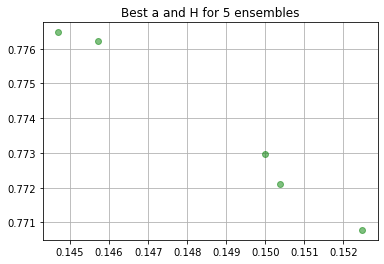

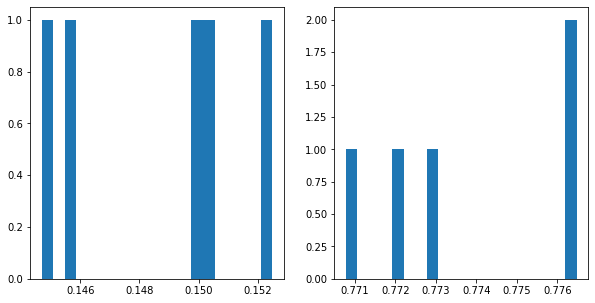

In [51]:
n = 5
os.mkdir('path')

for i in range(n):
    path = mcmc(df, 15000, True)
    np.savetxt(f'path/{i}.txt', path)

plt.grid(True)
plt.title(f'Best a and H for {n} ensembles')

for i in range(n):
    path = np.loadtxt(f'path/{i}.txt')
    a_path, H_path = path
    plt.plot(a_path[-1], H_path[-1], 'go', alpha=.5)

a_best_list = []
H_best_list = []
for i in range(n):
    path = np.loadtxt(f'path/{i}.txt')
    a_path, H_path = path
    if len(a_path)<8000:
        a_best_list.append(a_path[-1])
        H_best_list.append(H_path[-1])

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(a_best_list, bins=20)
ax[1].hist(H_best_list, bins=20)